Parcial 1: Estadística No paramétrica

In [2]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns

Punto 1

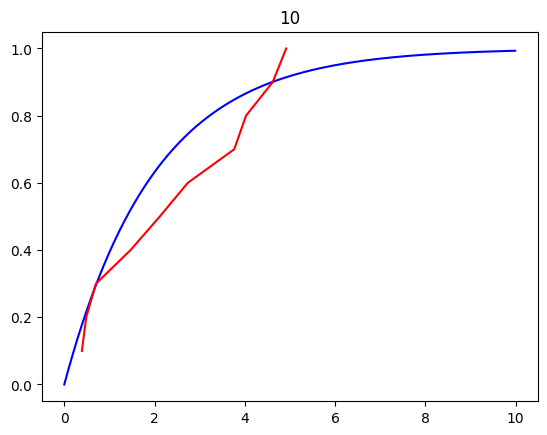

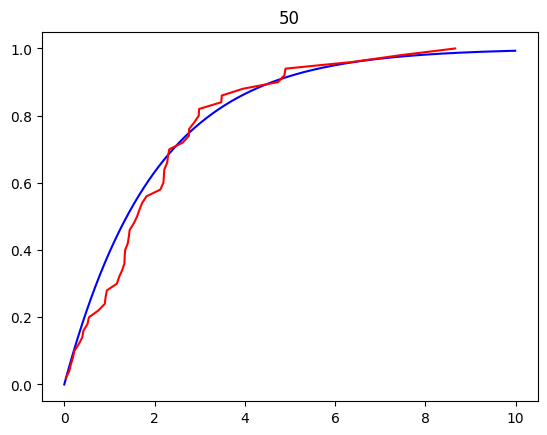

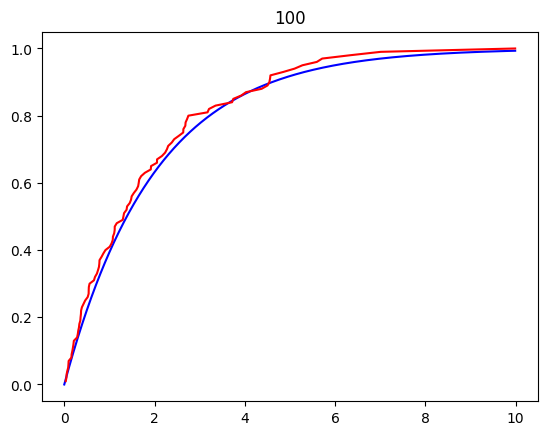

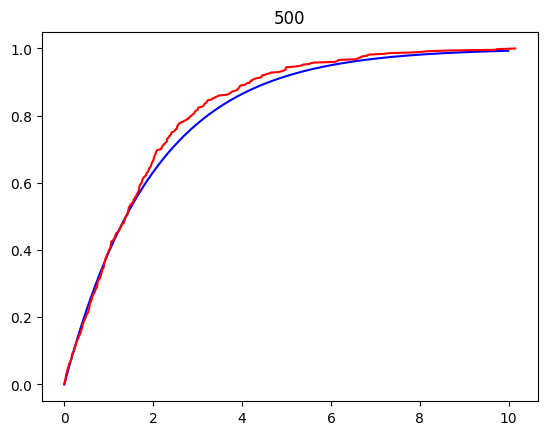

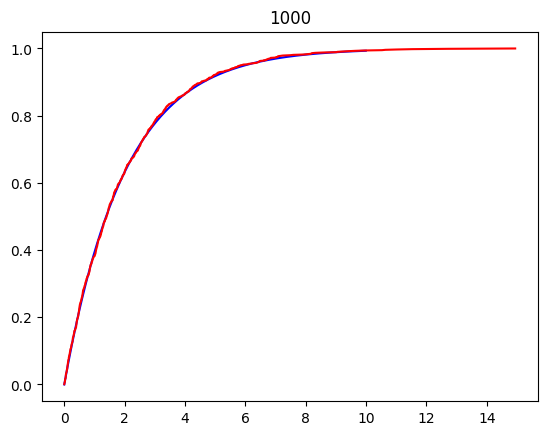

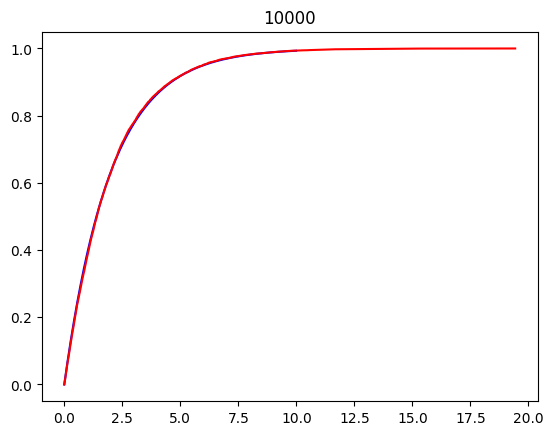

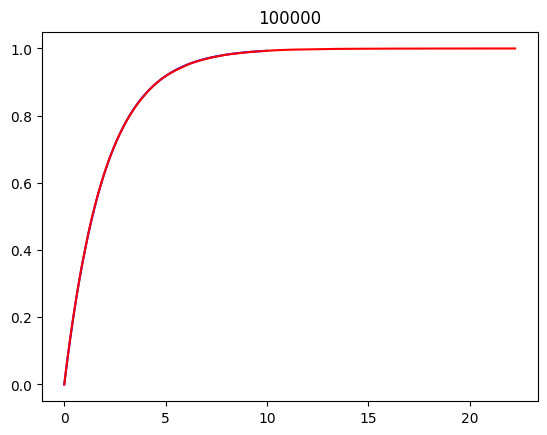

In [3]:
# Convergencia en distribución
from scipy.stats import expon

### Definimos nuestro soporte teorico
x = np.arange(0, 10, 0.01)
## Calculamos nuestra distribución teorica
F = expon.cdf(x, scale = 2)

### Simulamos n datos de la distribución quemada anteriormente

################################################################################
########## Calculando la ECDF (Función de distribución empirica) ###############
################################################################################

for n in [10, 50, 100, 500, 1000, 10000, 100000]:

  muestra = np.random.exponential(size = n, scale = 2)

  muestra = sorted(muestra) # ordenar los datos

  pesos_individuales = np.repeat(1/n, len(muestra)) ## Asignamos pesos individuales a cada elemento correspondiente a 1/n
  F_n = np.cumsum(np.repeat(1/n, len(muestra))) ### Acumulamos la suma de los pesos indivuales

  plt.figure()
  plt.plot(x, F, color = "blue")
  plt.plot(muestra, F_n, color = "red")
  plt.title(n)


De los gráficos, se observa como a medida que el tamaño de n aumenta, las distribuciones son cada vez más similares. Concluimos que los números aleatorios generados por la función "exponential" de Numpy convergen en distribución a la función teórica de una variable aleatoria exponencial con el mismo parámetro.

Punto 2

In [4]:
def mean(x):
  return(sum(x)/len(x))

def sq_mean(x):
  return((sum(x**2)/len(x))**(1/2))

def geom_mean(x):
  return((np.prod(x))**(1/len(x)))

def w_mean(x, w):
  if (np.round(sum(w), 4) == 1.0000):
    return(sum(x*w))
  else:
    return("Error: Ingrese un conjunto de pesos w que sumen 1.")

def trim_mean(x, alpha):
  if alpha >= 0 and alpha <=1:
    p = int((alpha/2) * len(x))
    x = sorted(x)
    print(f"Numero de datos recortados: {2*p}")
    return(sum(x[p:-p])/(len(x)-2*p))

def median(x):
  n = len(x)
  x = sorted(x)
  if n%2 != 0:
    return(x[(n-1)//2])
  else:
    return((x[(n//2)-1] + x[n//2])/2)
  
def sd(x):
  x_bar = sum(x)/len(x)
  return((sum((x-x_bar)**2)/(len(x)-1))**(1/2))


def MAD(x, k = (1/0.6745)):
  x_tilde = median(x)
  return(k * median(np.abs(x-x_tilde)))

#print(f"Promedio aritmerico: {mean(x)}")
#print(f"Media Cuadratica: {sq_mean(x)}")
#print(f"Media geometrica: {geom_mean(x)}")

#w = np.random.uniform(1, 100, size = len(x)); w = w/sum(w)

#print(f"Media ponderada: {w_mean(x, w)}")
#alpha = 0.06; trimean = trim_mean(x, alpha)
#print(f"Media recortada al {np.round(100*alpha)}%: {trimean}")
#print(f"Mediana (Q2): {median(x)}")


Numero de datos recortados: 2


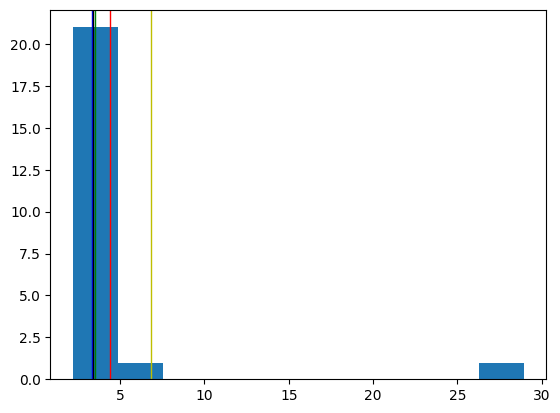

In [10]:
x = np.array([2.20, 2.40, 2.40, 2.50, 2.70, 
    2.80, 2.90, 3.03, 3.03, 3.10, 3.37, 3.40,
    3.40, 3.40, 3.50, 3.60, 3.70, 3.70, 3.70,
    3.70, 3.77, 5.28, 28.95])

plt.hist(x)
# Rojo: Media aritmetica
plt.axvline(mean(x), color='r', linestyle='-', linewidth=1)
# Amarillo: Media cuadratica
plt.axvline(sq_mean(x), color='y', linestyle='-', linewidth=1)
# Verde: Media geométrica
plt.axvline(geom_mean(x), color='g', linestyle='-', linewidth=1)
# Azul: Media recortada
alpha = 0.09; trimean = trim_mean(x, alpha)
plt.axvline(trimean, color='b', linestyle='-', linewidth=1)
# Negro: Mediana
plt.axvline(median(x), color='k', linestyle='-', linewidth=1)


Según la gráfica, se ve claramente que la Media aritmetica (linea roja) y la Media cuadratica (linea amarilla) son las métricas más susceptible a cambiar cuando hay datos contaminados (outliers), lo que concuerda con el conocimiento teórico que tenemos, ya que por ejemplo la media cuadratica penaliza mucho más (cuadrático) que las otras métricas. Además, sabemos que la mediana es una medida robusta con el mejor breakpoint posible (0.5), por lo que podemos afirmar, que en este caso, como la Media geométrica (linea verde) y la Media recortada (linea azul) estan muy cerca a la mediana, estas se desempeñan bien con este conjunto de datos así tenga datos claramente contaminados (ejm: 28.95).


Punto 3: Hoja

Punto 4

In [25]:
print(f"K = {1/np.log((1+np.sqrt(5))/2)}")
k_ = 1/np.log((1+np.sqrt(5))/2)
print(f"MAD: {MAD(x, k=1/np.log((1+np.sqrt(5))/2))}")

K = 2.0780869212350273
MAD: 0.7688921608569603


In [30]:
## Convergencia casi segura
N = 100

b = 3 ### Este es parametro de simulación y nuesta v.a. X
epsilon = 0.01 ### Tolerancia
for n in [1000, 10000, 100000, 1000000]:
  difs = []
  for _ in range(N):
    muestra = np.random.exponential(scale = b, size = n) ### v.a. X_n:simulando n muestras
    var = MAD(muestra, k = k_)
    difs.append(np.abs(var-b))

  P = sum(np.array(difs) < epsilon)/N
  print(P)


0.05
0.15
0.49
0.96


De la simulación anterior, podemos ver que con un tamaño de muestra lo suficientemente adecuado, k*MAD(x) converge casi seguramente a σ=β.